In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

The following steps are to be taken to implement the transfer learning model in Python.

**Reading the image dataset (Fashion MNIST)**

In the very first step, we are going to load the dataset, the dataset is taken from the built-in module of TensorFlow. The base model will be trained on the fashion MNIST dataset below we will get a load in the system.  

In [2]:
import tensorflow as tf
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


We have loaded both training and testing sets, let’s take look at the shapes of both sets.

In [3]:
# Shape of training and test patterns
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

So we have 60,000 image samples for training the model and 10,000 samples to test the model.

**Data Preprocessing**

Now we will scale down all pixel values because the neural network is highly sensitive to large values and for the images, it is obvious to have different values for each pixel. So now below we will scale down all the pixel values.

In [4]:
# Scaling the pixel values to be between 0 and 1
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255
X_test = X_test / 255

Let’s take look at how the images look like. 

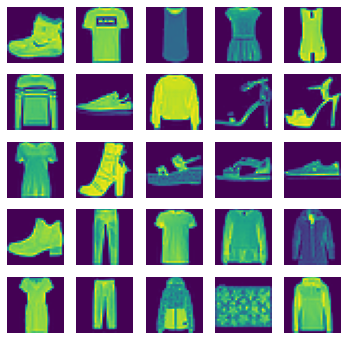

In [5]:
# Visualizing some images
import matplotlib.pyplot as plt
import numpy as np
fig,axes = plt.subplots(5, 5, figsize = (6,6))
axes = axes.ravel()
for i in range(0,25):
    axes[i].imshow(X_train[i])
    axes[i].axis("off")

In [6]:
X_train.shape

(60000, 28, 28)

Now before utilizing the above image as it is, we need to color channel. Inherently the images are in greyscale and its corresponding color channel is 1. 

In [7]:
# Reshaping the training and test features
import tensorflow as tf
X_train = tf.reshape(X_train, (-1, 28, 28, 1))
X_test = tf.reshape(X_test, (-1, 28, 28, 1))
print(X_train.shape, X_test.shape)

2023-02-05 11:55:26.365665: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-05 11:55:26.366725: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-05 11:55:26.553930: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-05 11:55:26.554804: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-05 11:55:26.555582: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

(60000, 28, 28, 1) (10000, 28, 28, 1)


2023-02-05 11:55:26.561744: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-05 11:55:26.818413: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-05 11:55:26.819314: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-05 11:55:26.820194: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA 

By checking the shapes we can see that we have added a color channel to all the images. 

**Defining and Training the Base CNN model**

Now we will start building the base CNN model, below we will first import all the dependencies required to build the model. 

In [8]:
# Library for CNN Model
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.callbacks import TensorBoard

The base model will consist of 3 convolutional layers and 3 dense layers, except for the last dense layer all the neurons of all the layers are fired according to the ReLu activation function. 

In [9]:
#Defining the Convolutional Neural Network
cnn_model = Sequential()
cnn_model.add(Conv2D(32, (3, 3), input_shape = (28,28, 1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Conv2D(64, (3, 3), input_shape = (28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Conv2D(128, (3, 3), input_shape = (28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(units = 256, activation = 'relu'))
cnn_model.add(Dense(units = 128, activation = 'relu'))
cnn_model.add(Dense(units = 10, activation = 'softmax'))
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 128)               0

By looking at the above summary we have nearly 160k model parameters to be trained and also we can confirm the model layers.

Now let’s compile the base model with loss function and optimizer, the sparse_categorical_crossentropy is the loss function we are using as we have two classes to predict and Adam will be the optimizer which will optimize the loss function.  

In [10]:
# Compiling
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer='adam' ,metrics =['accuracy'])

Let’s start training the model, the training will go long for 20 epochs with a batch size of 512. 

In [11]:
# Training the CNN model
cnn_model.fit(X_train, y_train, batch_size = 512, epochs = 20, verbose = 1)

2023-02-05 11:55:32.056707: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20


2023-02-05 11:55:34.296827: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


118/118 [==============================] - 13s 12ms/step - loss: 0.9552 - accuracy: 0.6594
Epoch 2/20
118/118 [==============================] - 1s 12ms/step - loss: 0.5639 - accuracy: 0.7943
Epoch 3/20
118/118 [==============================] - 1s 11ms/step - loss: 0.4755 - accuracy: 0.8269
Epoch 4/20
118/118 [==============================] - 1s 11ms/step - loss: 0.4256 - accuracy: 0.8455
Epoch 5/20
118/118 [==============================] - 1s 11ms/step - loss: 0.3960 - accuracy: 0.8556
Epoch 6/20
118/118 [==============================] - 1s 11ms/step - loss: 0.3733 - accuracy: 0.8634
Epoch 7/20
118/118 [==============================] - 1s 11ms/step - loss: 0.3444 - accuracy: 0.8739
Epoch 8/20
118/118 [==============================] - 1s 11ms/step - loss: 0.3261 - accuracy: 0.8801
Epoch 9/20
118/118 [==============================] - 1s 11ms/step - loss: 0.3187 - accuracy: 0.8827
Epoch 10/20
118/118 [==============================] - 1s 11ms/step - loss: 0.2992 - accuracy: 0.8898

Within just 20 epochs the model has obtained phenomenal accuracies. 

In order to leverage the trained parameters of the above model for others, we need to save the model. The Below code will save the model parameters. 

In [12]:
# Saving trained CNN model's weights
cnn_model.save('cnn_mnist.h5', save_format='h5')

**Transfer Learning**

In this step, we will realise the transfer learning. The following steps are necessary in order to successfully transfer the learning model. 

**Instantiating a new model with old parameters**

Now we will create the new Keras model and will initialize it with parameters of old models that we have saved earlier. 

In [13]:
# Creating new CNN model using previous model's weights
reconstructed_model = keras.models.load_model('/kaggle/working/cnn_mnist.h5')
reconstructed_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 128)               0

Above we can in the summary of the reconstructed model which is the same as the base model, so we have successfully loaded the base model.

**Freezing previous parameters and defining the new model**

In order to utilize the knowledge from the base model, we need to freeze all the layers which means when we train the new model the parameter of the base model will not be updated. Now below we will create the blank sequential model and will add all layers from the base model except the last classifier layer. 

In [14]:
from keras.models import Sequential
cnn2 = Sequential()
# Extract all the layers from the base model except the last layer
for layer in reconstructed_model.layers[:-1]:
  cnn2.add(layer)
# Freeze all the layers of the base model
for layer in cnn2.layers:
  layer.trainable=False

After adding and freezing the layers from the base model we will add a couple of more layers to the new model and lastly one classifier layer. 

In [15]:
# adding new layers 
cnn2.add(Dense(512,activation=('relu'),input_dim=10))
cnn2.add(Dense(256,activation=('relu'))) 
cnn2.add(Dense(128,activation=('relu')))
cnn2.add(Dense(10,activation=('softmax')))
cnn2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 128)              

Above we can check the in the summary all model layers from the base model and newly added layers.  

**Reading New Dataset (Handwritten MNIST)**

Like an earlier step now we load the MNIST digit dataset here we will read a different dataset popularly known as the MNIST handwritten dataset. After that, we will preprocess it and check a few sample images to understand the dataset. 

11501568/11490434 [==============================] - 0s 0us/step


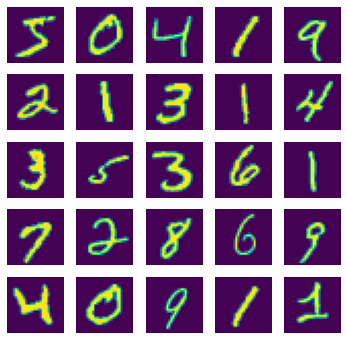

In [16]:
# Handwritten MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
# Scaling the pixel values to be between 0 and 1
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255
X_test = X_test / 255
# Visualizing some images
import matplotlib.pyplot as plt
import numpy as np
fig,axes = plt.subplots(5, 5, figsize = (6,6))
axes = axes.ravel()
for i in np.arange(0,25):
    axes[i].imshow(X_train[i])
    axes[i].axis("off")

Below we will add the grey color channel to all the digits images. 

In [17]:
# Reshaping the training and test features
X_train = tf.reshape(X_train, (-1, 28, 28, 1))
X_test = tf.reshape(X_test, (-1, 28, 28, 1))
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28, 1) (60000,) (10000, 28, 28, 1) (10000,)


**Training new CNN**

Now let’s compile and train the model as did for the base model. 

In [18]:
# Compiling the new model
cnn2.compile(loss ='sparse_categorical_crossentropy', optimizer='adam' ,metrics =['accuracy'])
# Training the new CNN model
cnn2.fit(X_train, y_train, batch_size = 512, epochs = 20, verbose = 1)

Epoch 1/20
118/118 [==============================] - 1s 7ms/step - loss: 0.9111 - accuracy: 0.7039
Epoch 2/20
118/118 [==============================] - 1s 6ms/step - loss: 0.5059 - accuracy: 0.8364
Epoch 3/20
118/118 [==============================] - 1s 7ms/step - loss: 0.4182 - accuracy: 0.8672
Epoch 4/20
118/118 [==============================] - 1s 6ms/step - loss: 0.3716 - accuracy: 0.8815
Epoch 5/20
118/118 [==============================] - 1s 6ms/step - loss: 0.3405 - accuracy: 0.8918
Epoch 6/20
118/118 [==============================] - 1s 6ms/step - loss: 0.3184 - accuracy: 0.8983
Epoch 7/20
118/118 [==============================] - 1s 6ms/step - loss: 0.3002 - accuracy: 0.9042
Epoch 8/20
118/118 [==============================] - 1s 6ms/step - loss: 0.2885 - accuracy: 0.9071
Epoch 9/20
118/118 [==============================] - 1s 6ms/step - loss: 0.2722 - accuracy: 0.9132
Epoch 10/20
118/118 [==============================] - 1s 6ms/step - loss: 0.2586 - accuracy: 0.9169

As we can see we have obtained an accuracy above 99% which is outstanding performance.  

**Making predictions with the new CNN**

Now let’s make a prediction using the above transfer model, on a random digit from the dataset. 

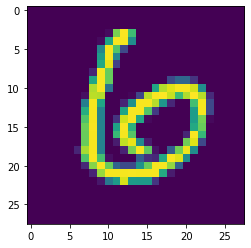

In [19]:
# Random image for testing
import matplotlib.pyplot as plt
actual2 = tf.reshape(X_test[11], (28, 28))
plt.imshow(actual2)

The digit we have chosen is 6 now let’s check what precision does model gives.  

In [20]:
# Predicting class label using new CNN model
import numpy as np
predicted_classes2 = cnn2.predict(X_test)
test_img2 = tf.reshape(X_test[11], (-1, 28, 28, 1))
prediction2 = cnn2.predict(test_img2)
print('Actual label: %d'% y_test[11])
print('Predicted label: %d'% np.argmax(prediction2[0]))

Actual label: 6
Predicted label: 6


As we can the actual label is 6 and the predicted label is also 6. 

So this is how we can implement the transfer learning model using Keras functionality in Python.